In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tourpackageprediction/tour_package.csv


**PROBLEM STATEMENT** :
"Visit with us". company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

**Aim**: To find out the variables which are most significant.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/kaggle/input/tourpackageprediction/tour_package.csv')
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

There are features with null values. ProdTaken is our target variable.

In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

There are null values in the features Age,TypeofContact,DurationOfPitch,NumberOfFollowups,NumberOfTrips, NumberOfChildrenVisiting and Monthly. We have to remove them.

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,NaN,NaN,NaN,202443.5,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,NaN,NaN,NaN,0.188216,0.390925,0.0,0.0,0.0,0.0,1.0
Age,4662.0,NaN,NaN,NaN,37.622265,9.316387,18.0,31.0,36.0,44.0,61.0
TypeofContact,4863,2,Self Enquiry,3444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,4888.0,NaN,NaN,NaN,1.654255,0.916583,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4637.0,NaN,NaN,NaN,15.490835,8.519643,5.0,9.0,13.0,20.0,127.0
Occupation,4888,4,Salaried,2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4888,3,Male,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumberOfPersonVisiting,4888.0,NaN,NaN,NaN,2.905074,0.724891,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4843.0,NaN,NaN,NaN,3.708445,1.002509,1.0,3.0,4.0,4.0,6.0


The mean value and the maximum value of the variables DurationOfPitch, NumberOfTrips and MonthlyIncome varies a lot. Thus outliers exists.

Dropping the variable CustomerID since it has no use in our prediction model.

In [7]:
df=df.drop(['CustomerID'],axis=1)

In [8]:
columns=list(df.columns)
columns

['ProdTaken',
 'Age',
 'TypeofContact',
 'CityTier',
 'DurationOfPitch',
 'Occupation',
 'Gender',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'ProductPitched',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'Designation',
 'MonthlyIncome']

In [9]:
for i in columns:
    print(i)
    print(df[i].value_counts())
    print('............................')

ProdTaken
0    3968
1     920
Name: ProdTaken, dtype: int64
............................
Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
48.0     65
49.0     65
55.0     64
54.0     61
56.0     58
24.0     56
22.0     46
23.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: Age, dtype: int64
............................
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
............................
CityTier
1    3190
3    1500
2     198
Name: CityTier, dtype: int64
............................
DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     2

Observations :
1. Fe Male is misspelt so we convert it to Female
2. Single and unmarried does not mean the same. Unmarried means the customers has partners.


In [10]:
df['Gender']=df['Gender'].replace('Fe Male','Female')


**EDA to get insights**

Univariate Analysis

In [11]:
categorical=['ProdTaken','TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting','NumberOfFollowups','ProductPitched','PreferredPropertyStar','MaritalStatus','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','Designation',]

In [12]:
numerical=['Age','MonthlyIncome','DurationOfPitch']

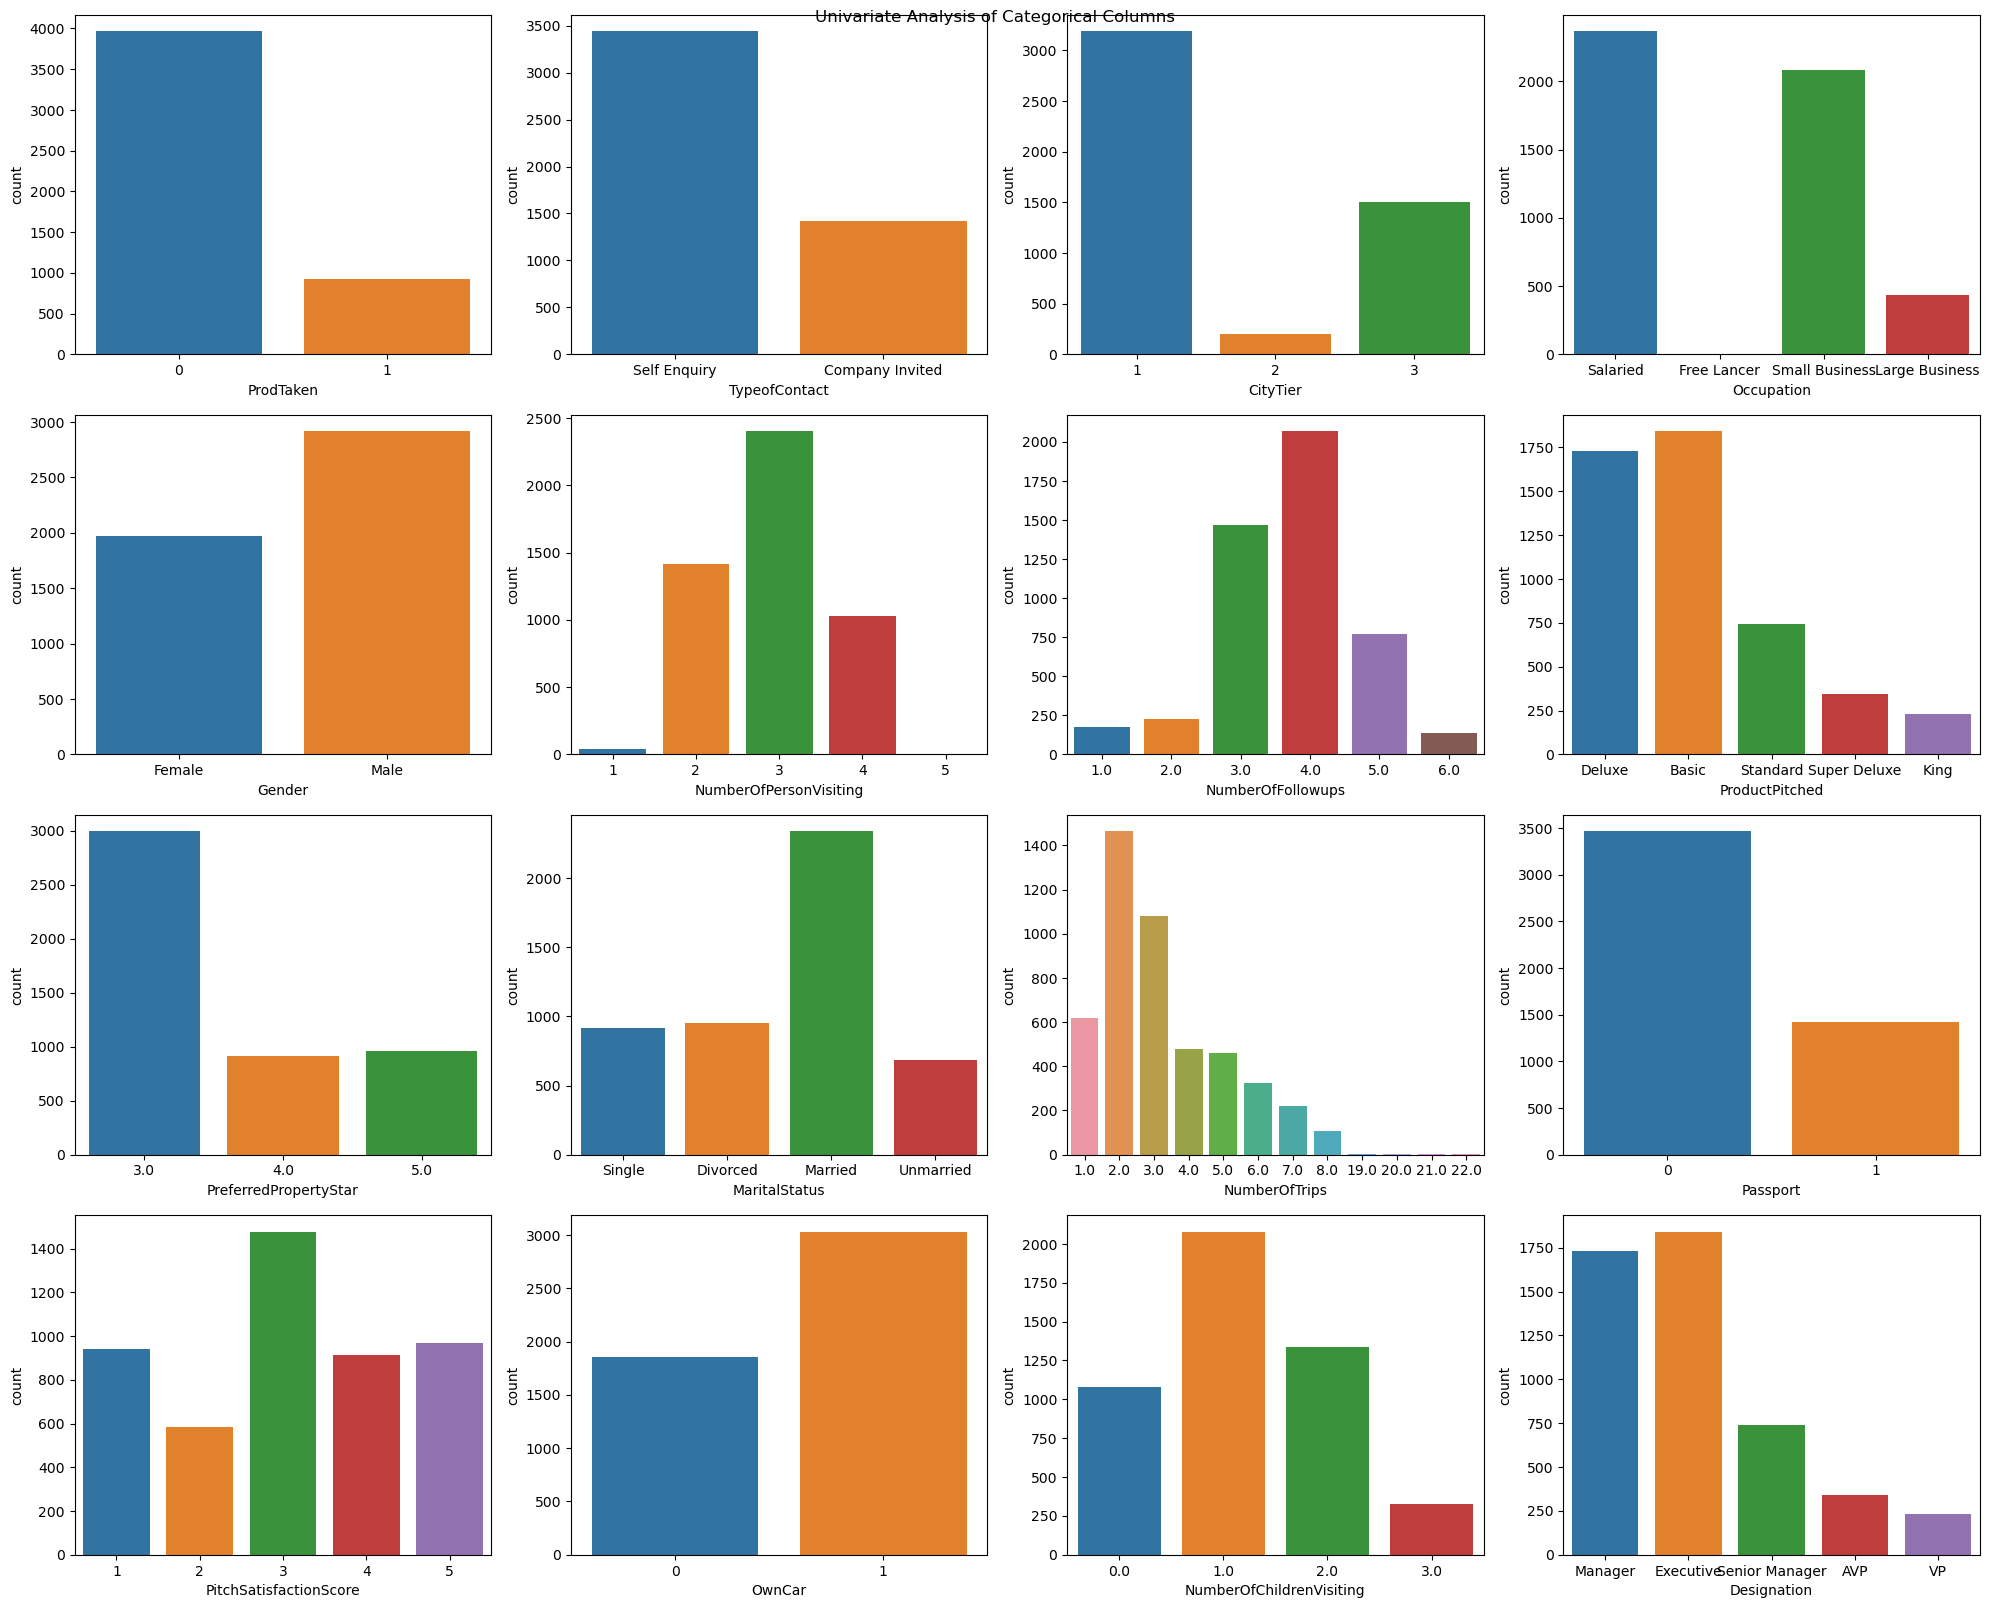

In [13]:
plt.figure(figsize=(20,20))
plt.suptitle('Univariate Analysis of Categorical Columns')
for i in range(0, len(categorical)):
    plt.subplot(5, 4, i+1)
    sns.countplot(x=df[categorical[i]])
    plt.tight_layout()

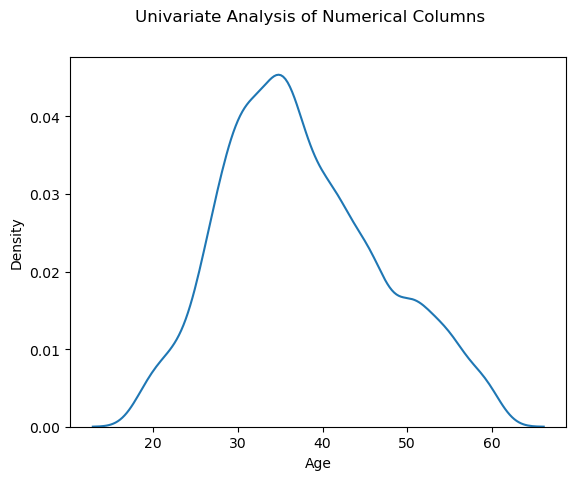

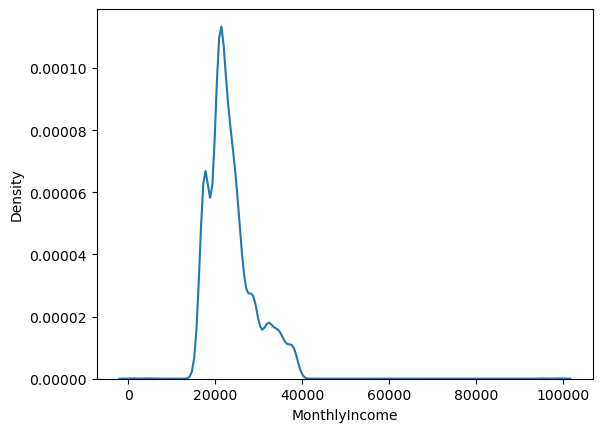

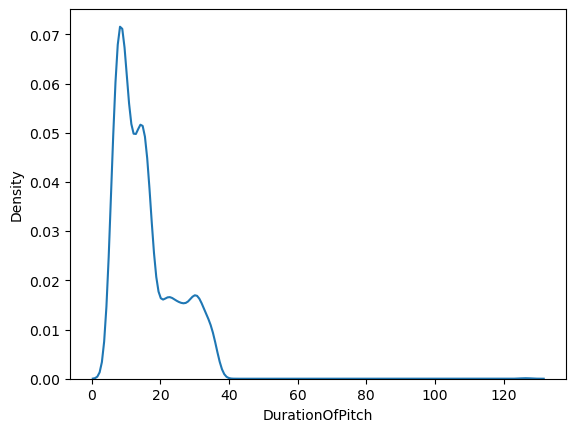

In [14]:
plt.suptitle('Univariate Analysis of Numerical Columns')
for i in range(0, len(numerical)):
    sns.kdeplot(x=df[numerical[i]])
    plt.show()
    

Observations :
1. DurationOfPitch is right skewed.
2. MonthlyIncome has outliers on both sides.
3. Age is normally distributed with no outliers.
4. NumberOfTrips is right skewed.
5. Dataset is unbalanced with ununiform distribution of the classes in the target variable.
6. Most of the people are from tier 1 cities.

Multivariate analysis

In [15]:
for data in categorical:
 print(pd.crosstab(df[data],df['ProdTaken'],margins=True))
 print('***********************************************')

ProdTaken     0    1   All
ProdTaken                 
0          3968    0  3968
1             0  920   920
All        3968  920  4888
***********************************************
ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2837  607  3444
All              3946  917  4863
***********************************************
ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
***********************************************
ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
***********************************************
ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        396

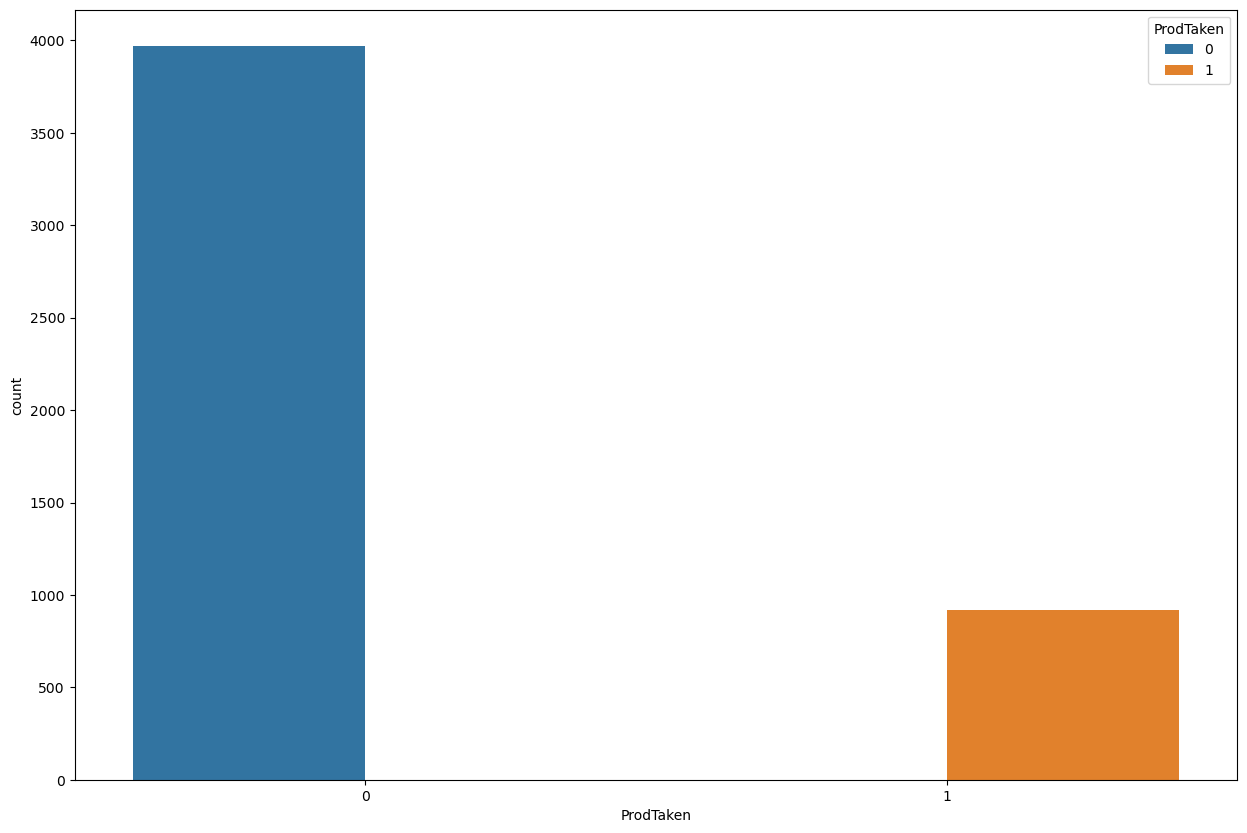

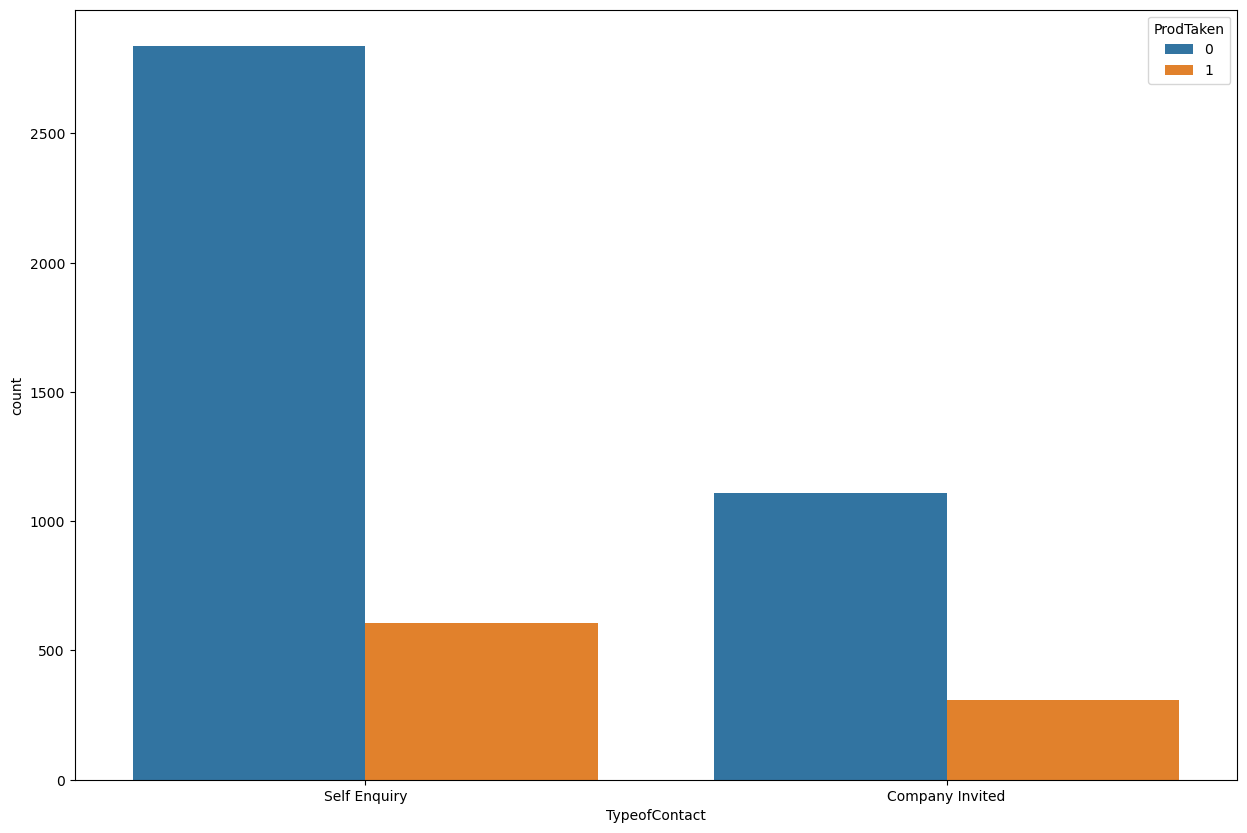

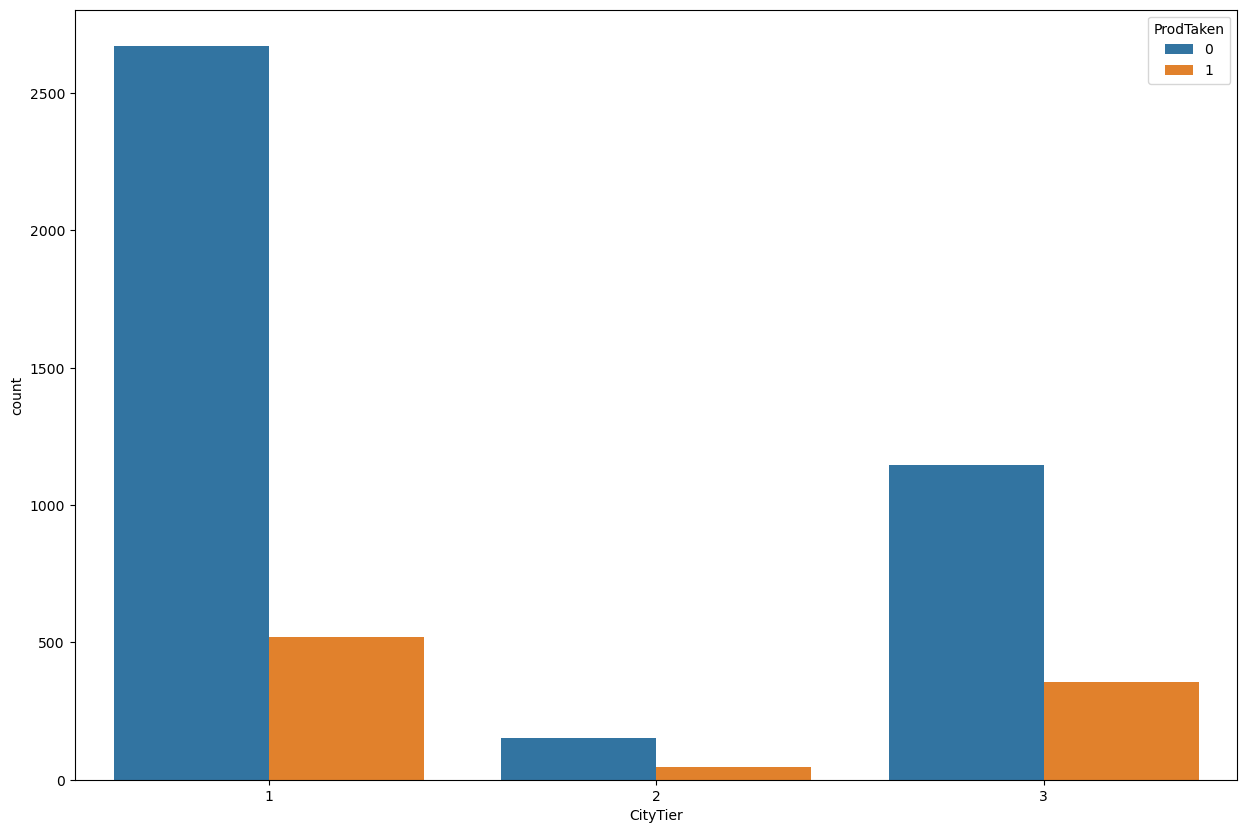

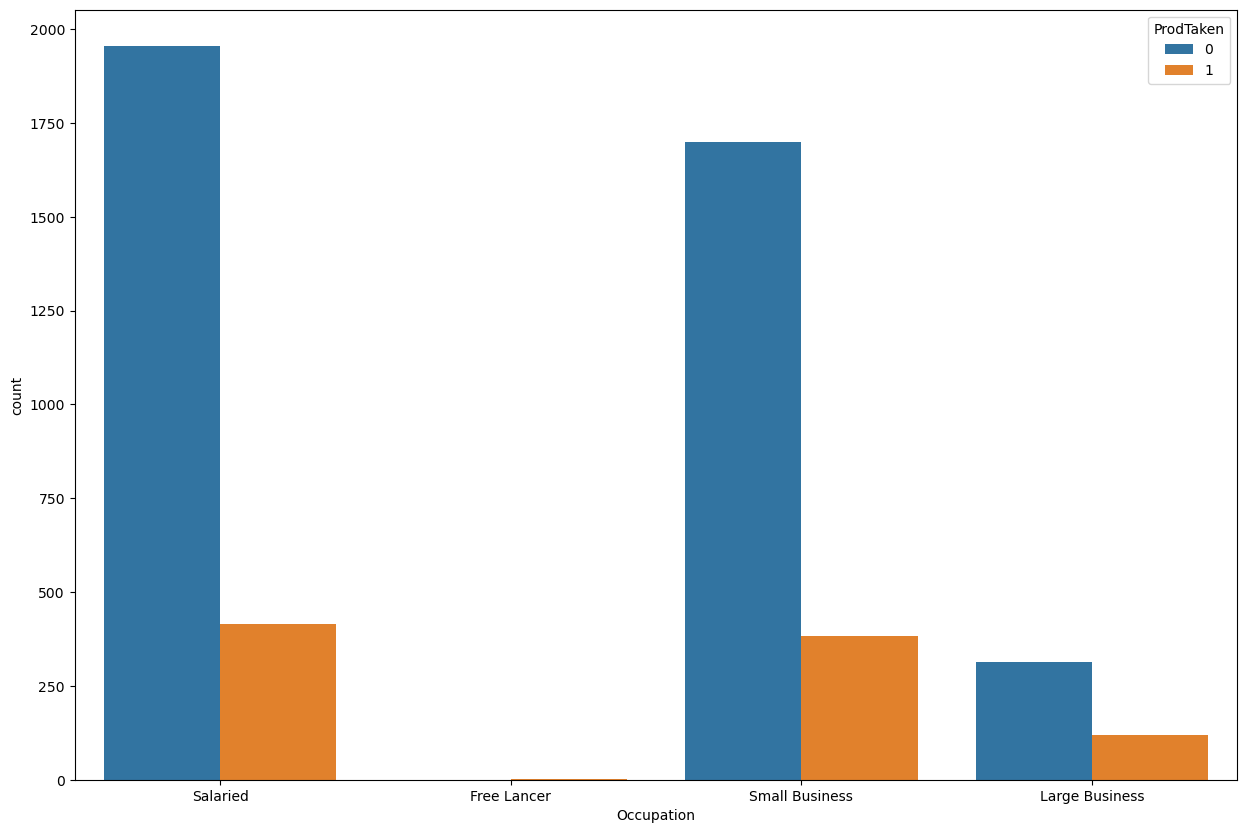

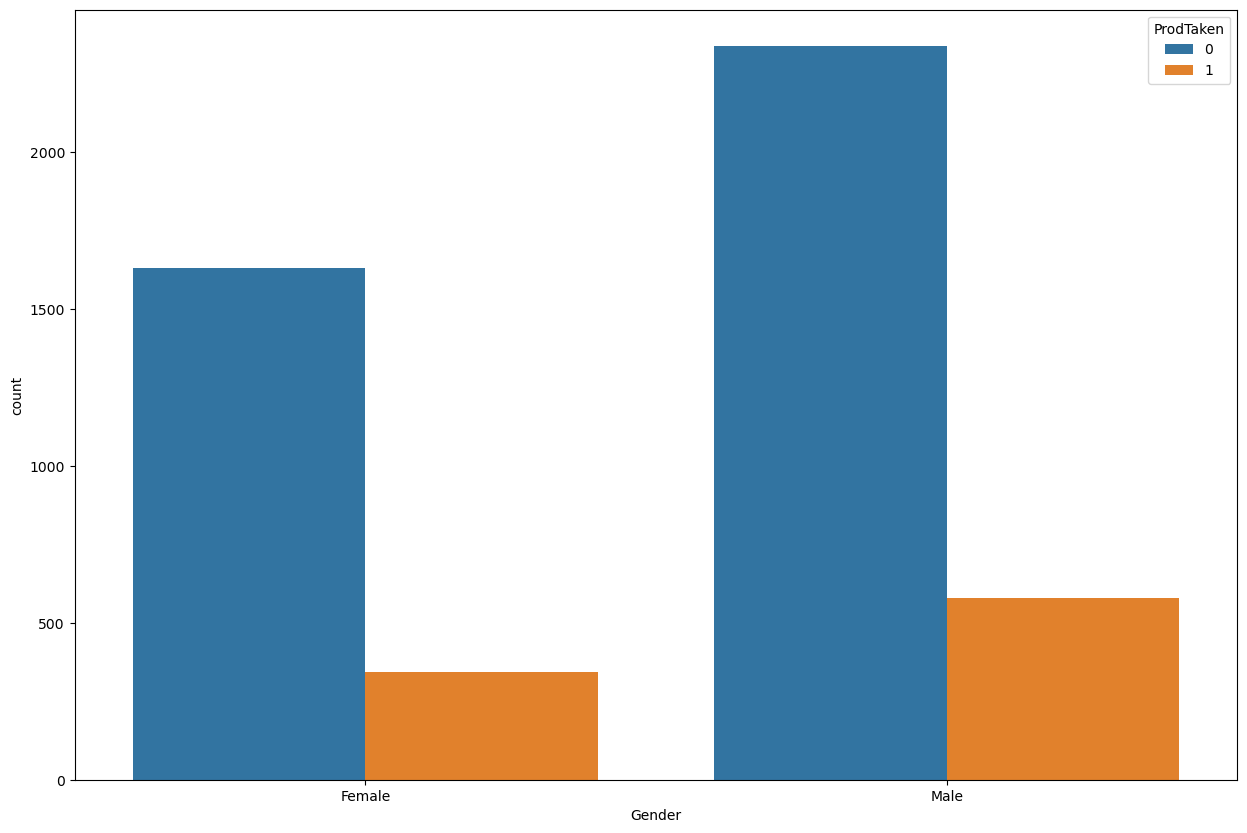

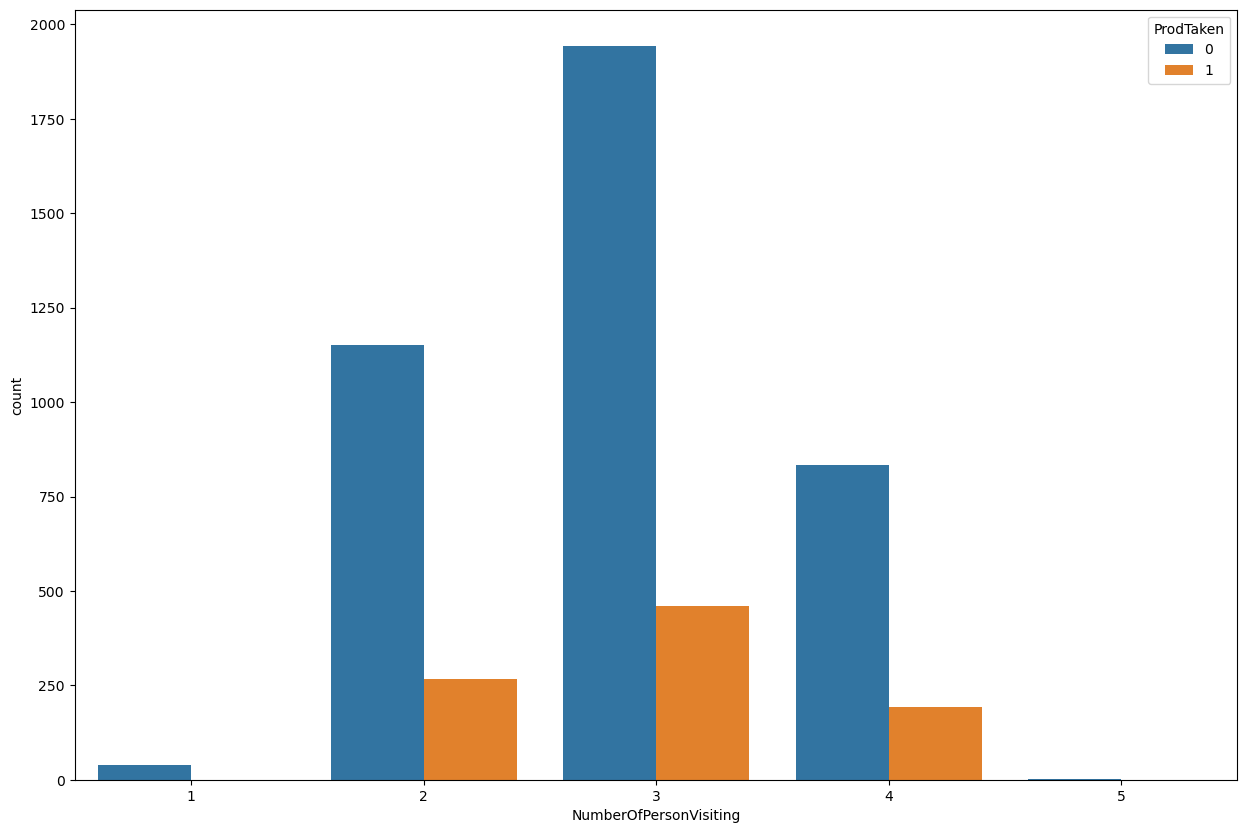

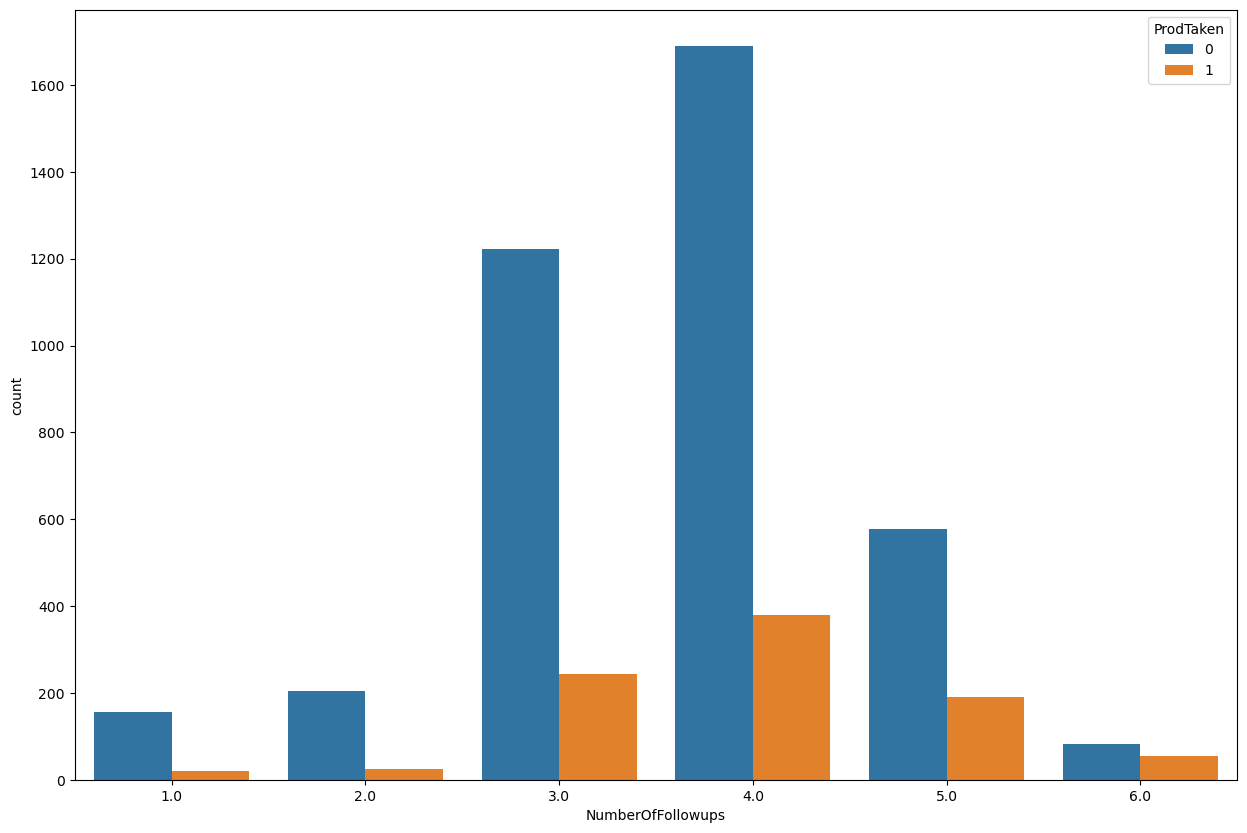

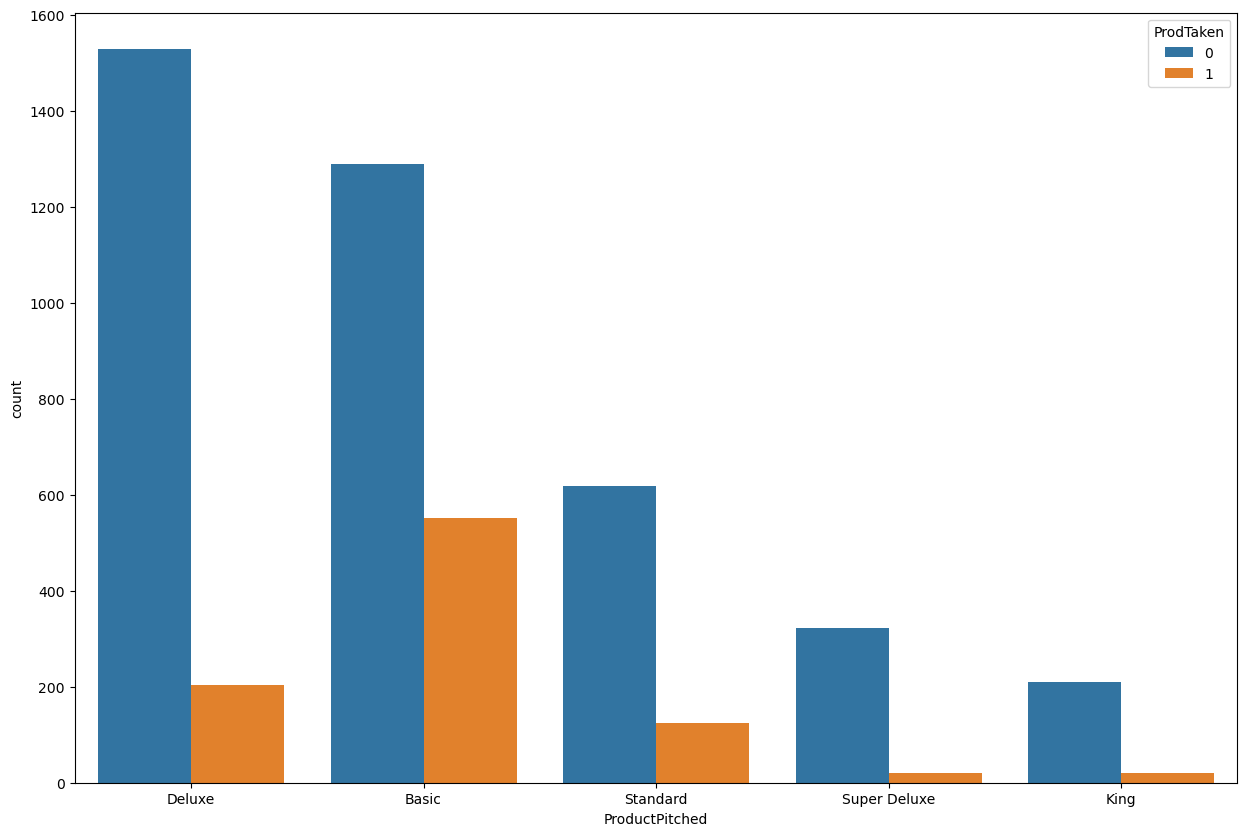

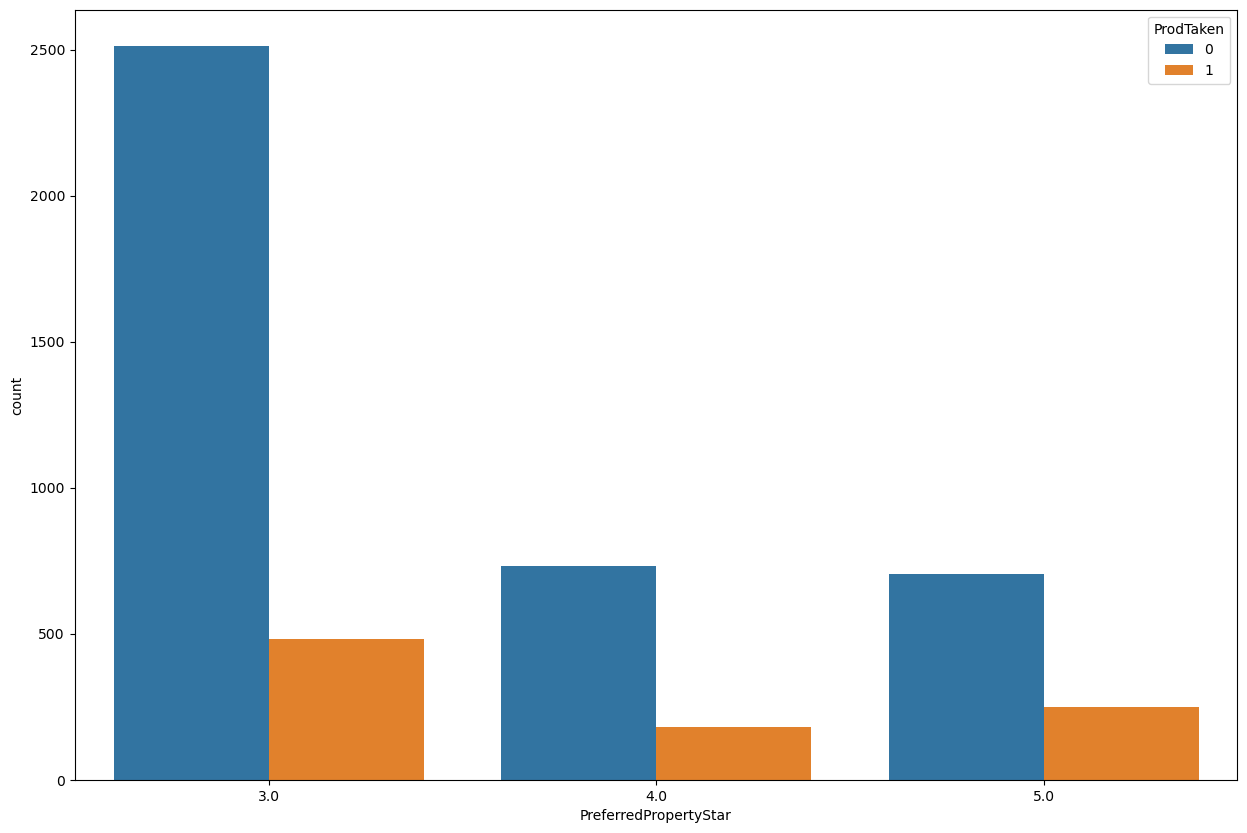

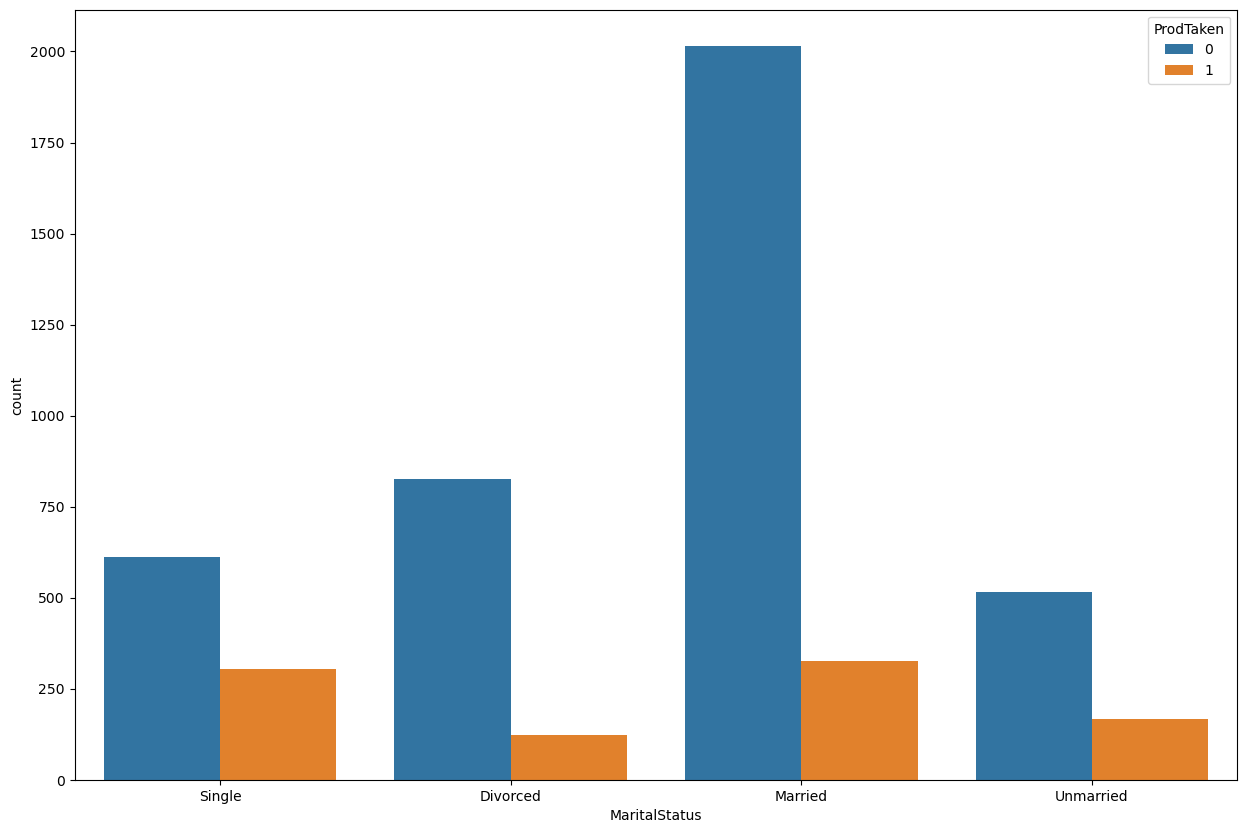

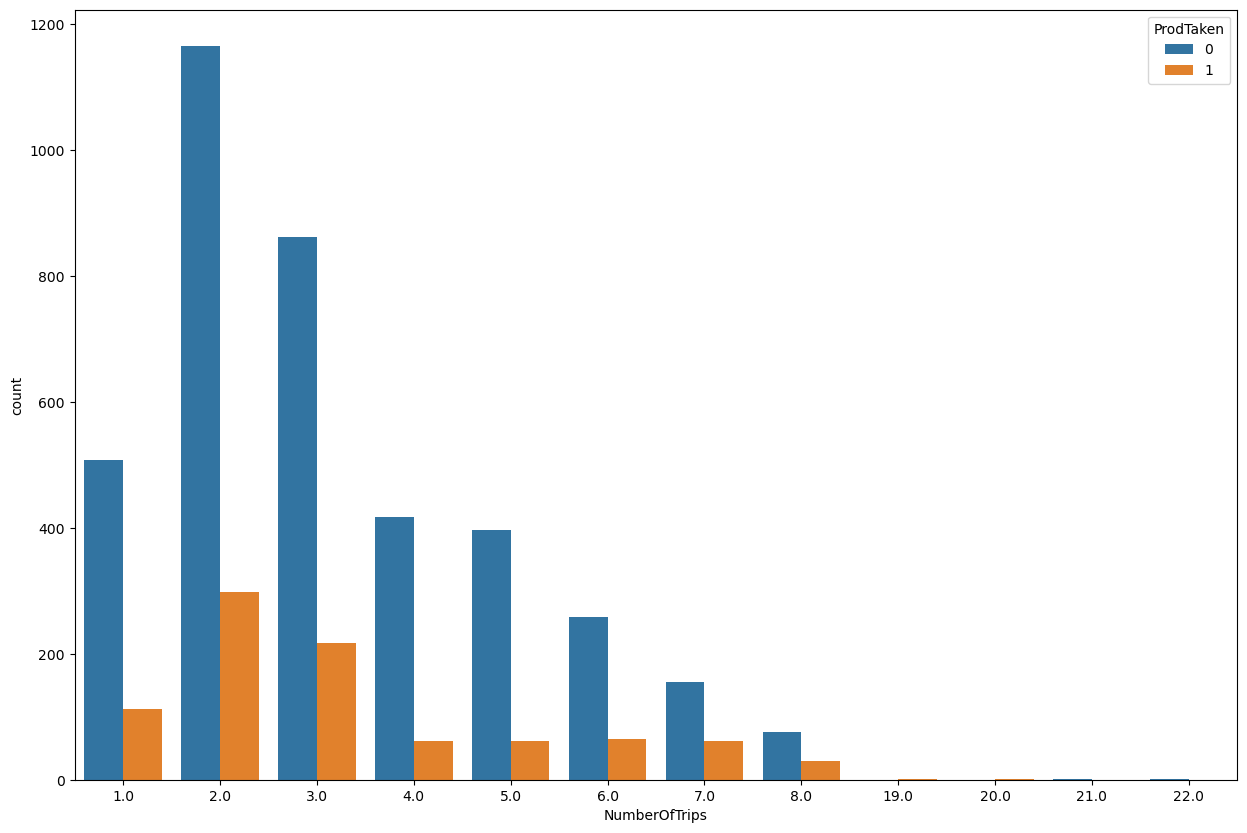

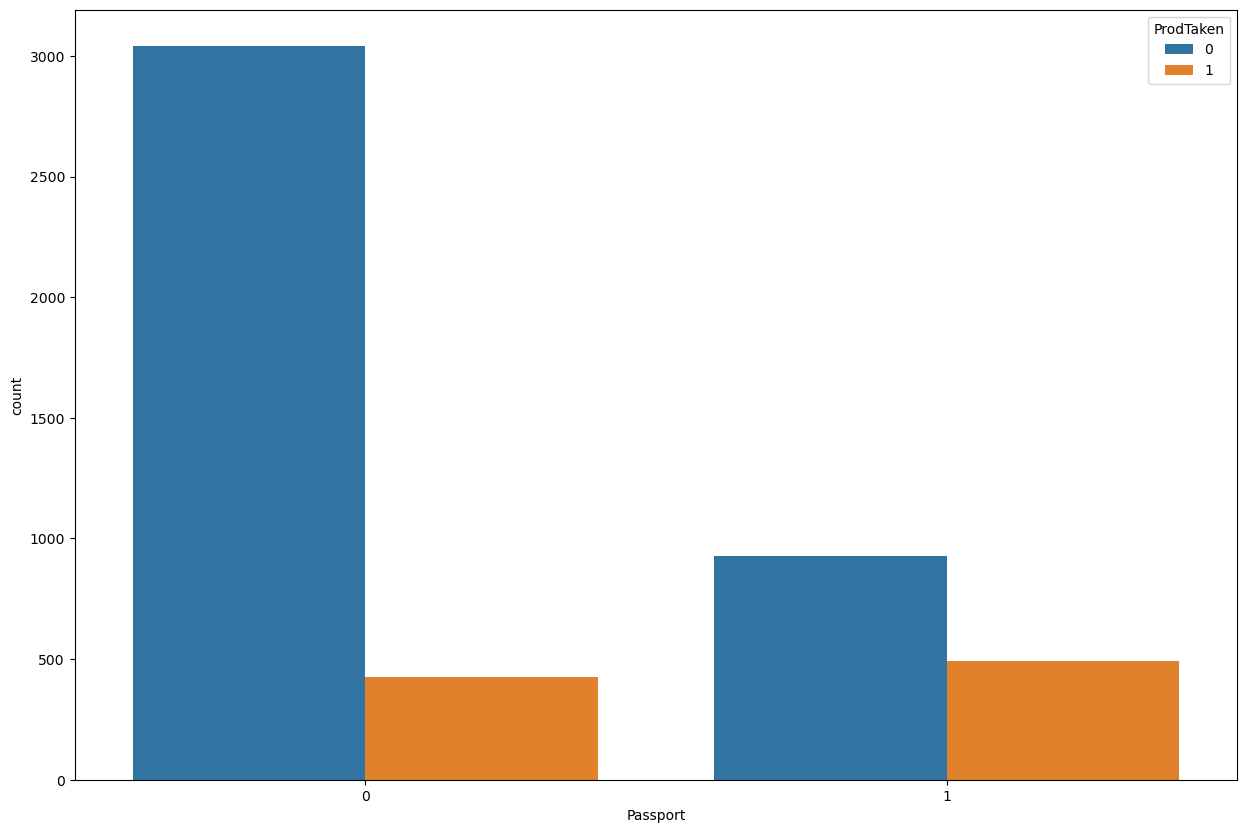

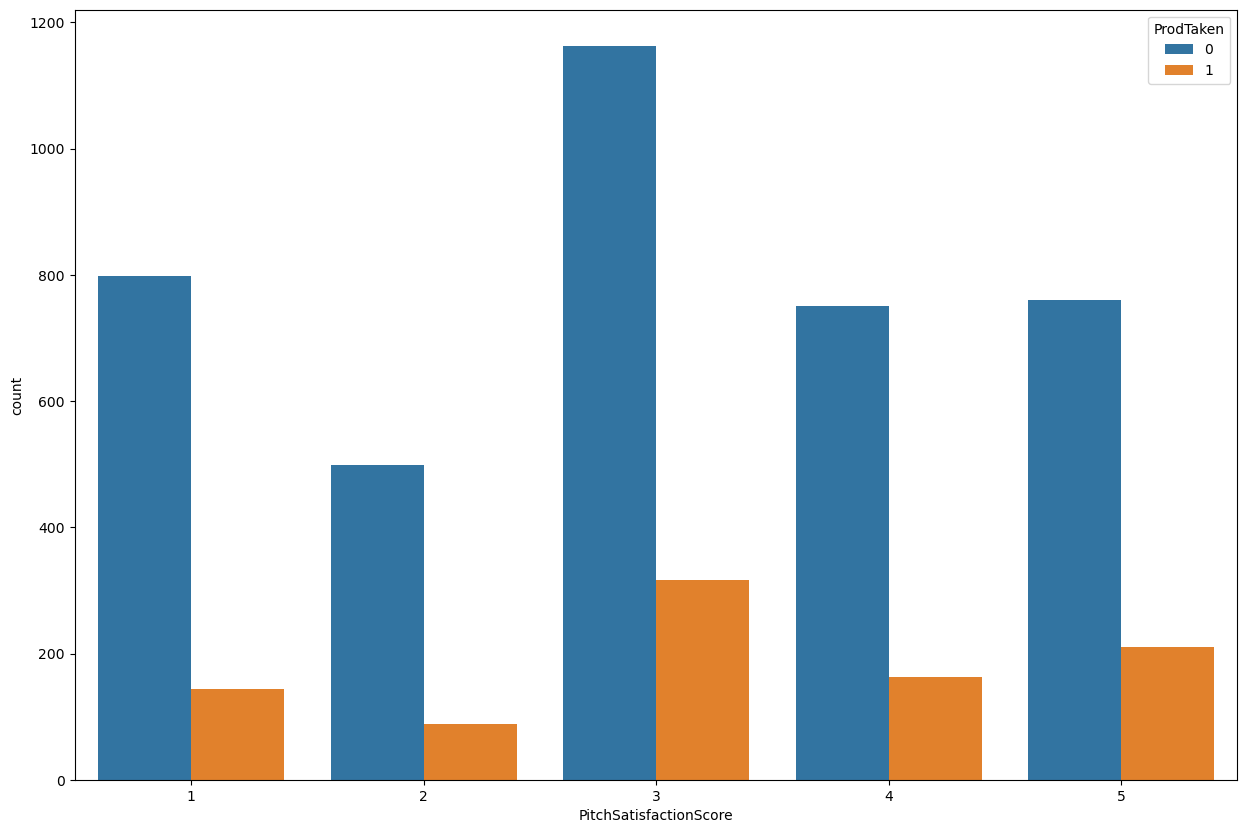

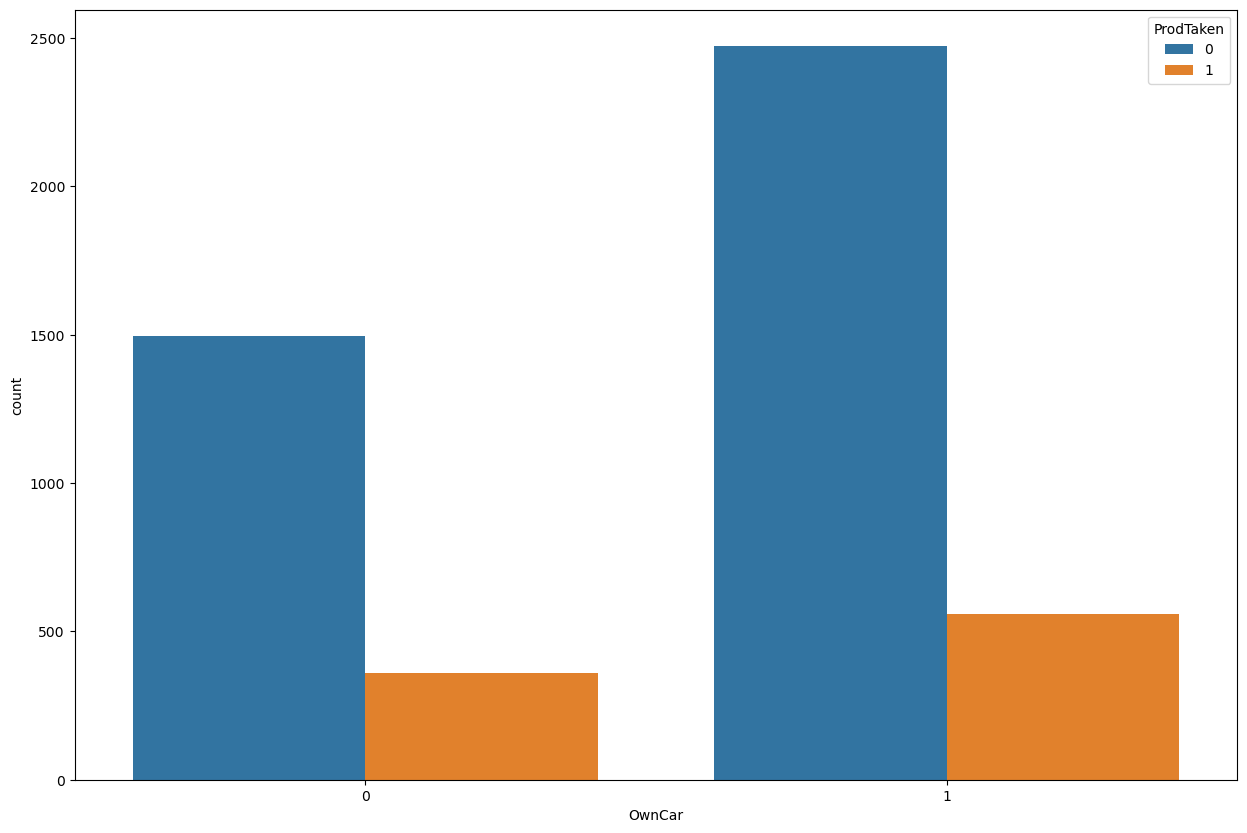

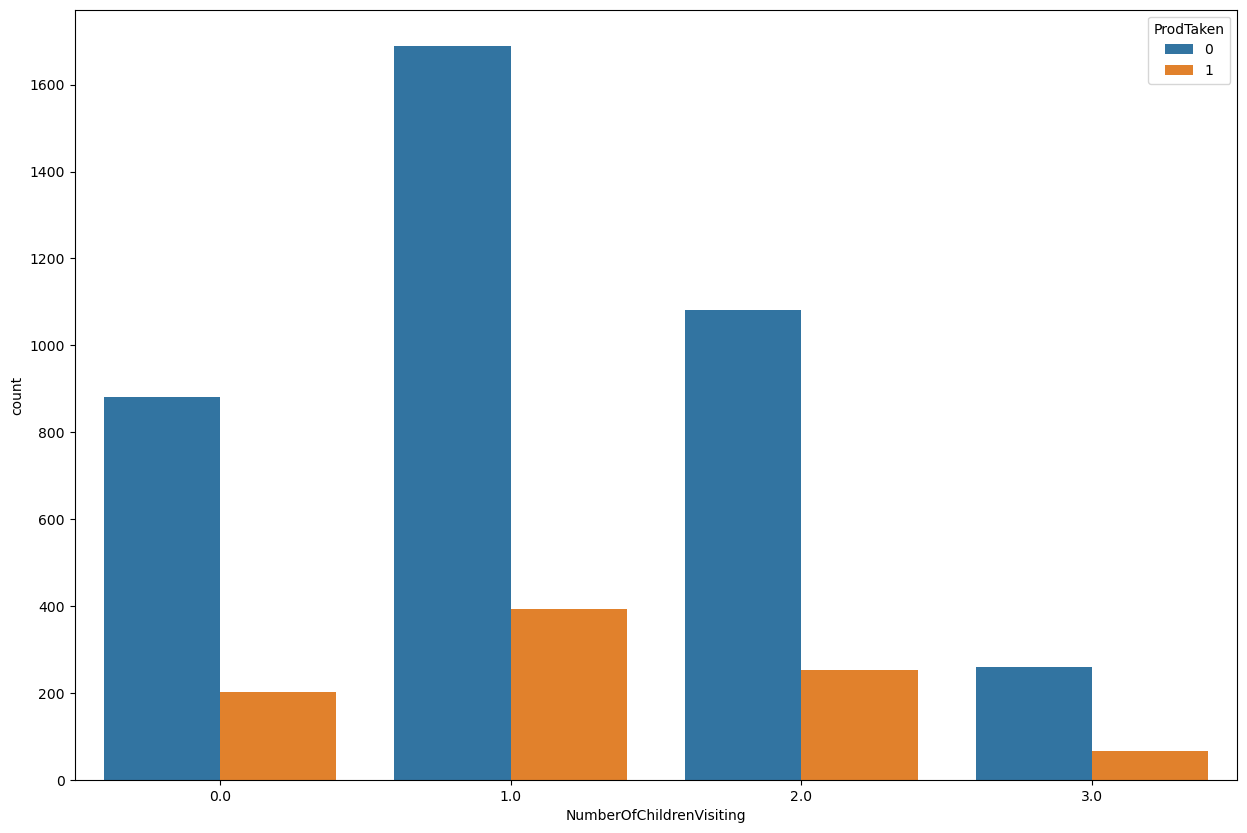

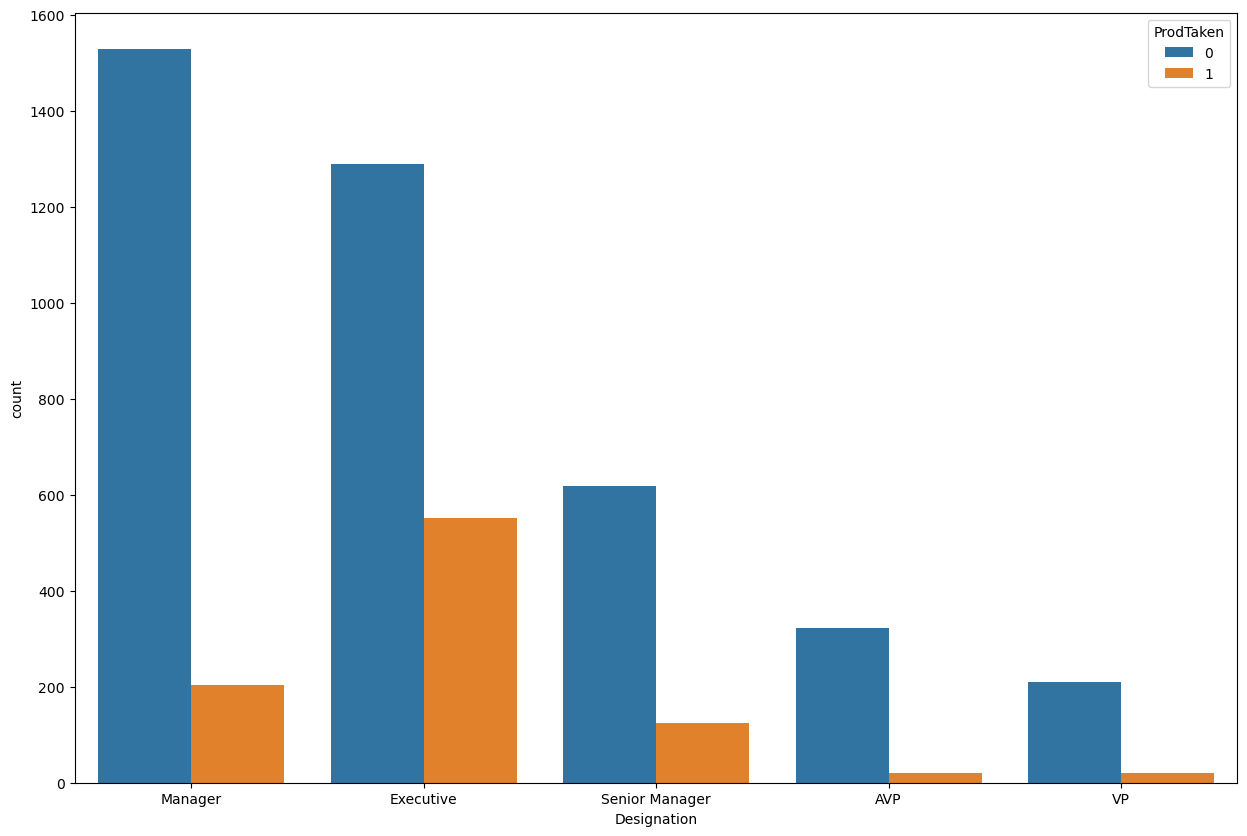

In [16]:
for i in categorical:
 plt.figure(figsize=(15,10))
 sns.countplot(x=i,hue='ProdTaken',data=df)
 
 plt.show()

Observations :
1. Mostly customer visting with 2,3,4 travellers purchased the product
2. Customers who were pitched basic package mostly brought the product
3. Most of the customers who bought the product were Executive
4. Customers who were followed up 4 times had purchased the product
5. Large Business owners have higher chance of purchasing the travel package
6. Single and unmarried people has higher chance of purchasing the travel package
7. Having a passport increased chances of purchasing the package
8. Customers who took 7/8 trips had higher chances of purchaing the packages

In [17]:
import plotly.express as px
for i in numerical:
 fig=px.strip(df,x=i,y='ProdTaken',orientation='h',color='ProdTaken')
 fig.show()

In [18]:
df.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545
PitchSatisfactionScore,0.051394,0.018510,-0.042160,-0.002880,-0.019581,0.004054,-0.022701,-0.004378,0.002926,1.000000,0.068850,0.000878,0.030421


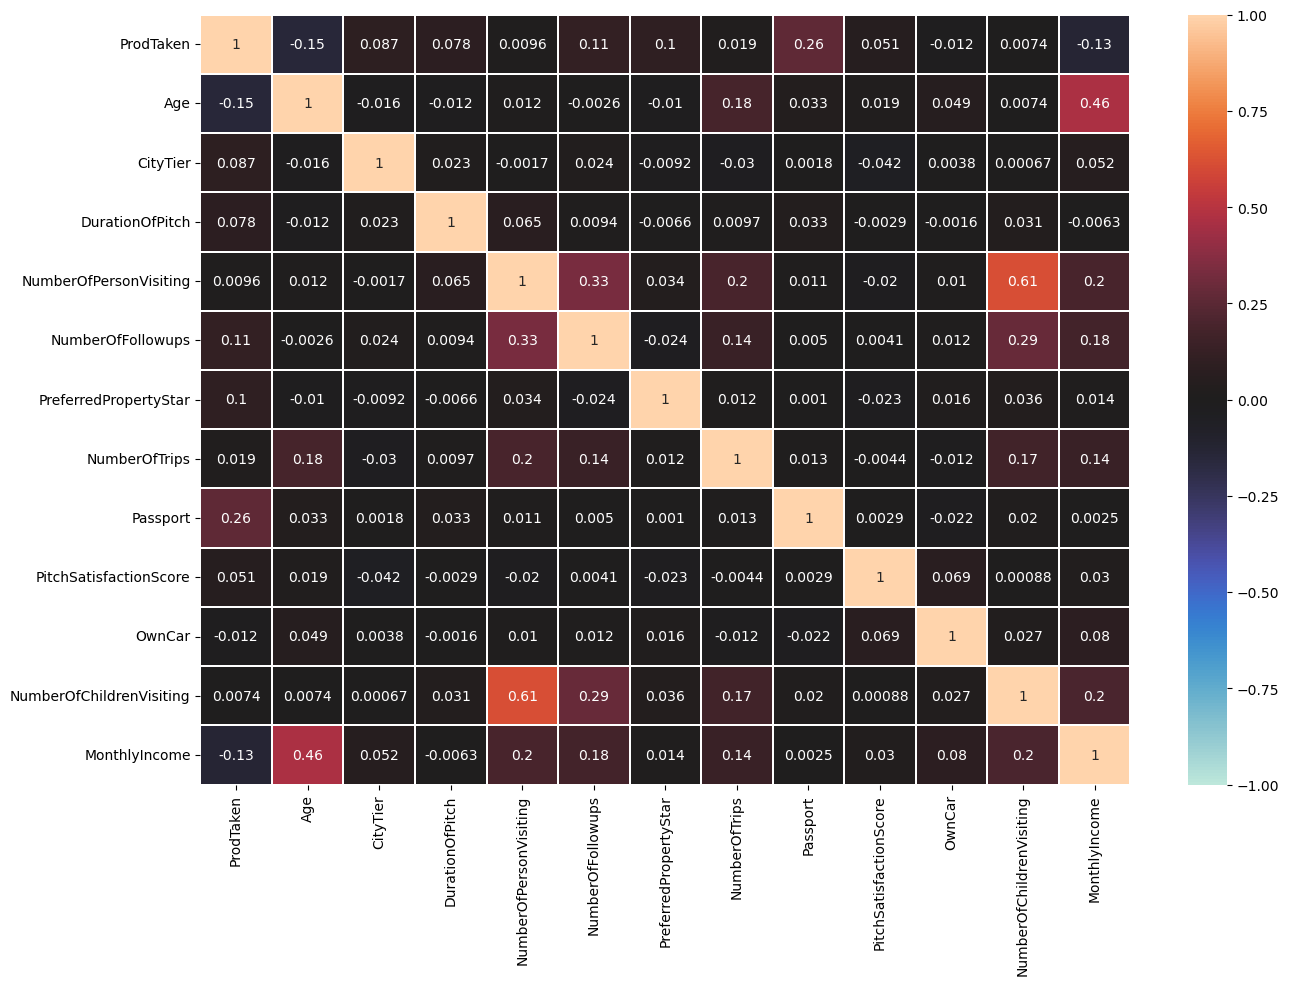

In [19]:
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(),annot=True,linewidths=0.2,vmax=1,vmin=-1,center=0)
plt.show()

Observations:
1. NumberOfChildrenVisiting and NumberOfPersonVisiting are highly correlated.


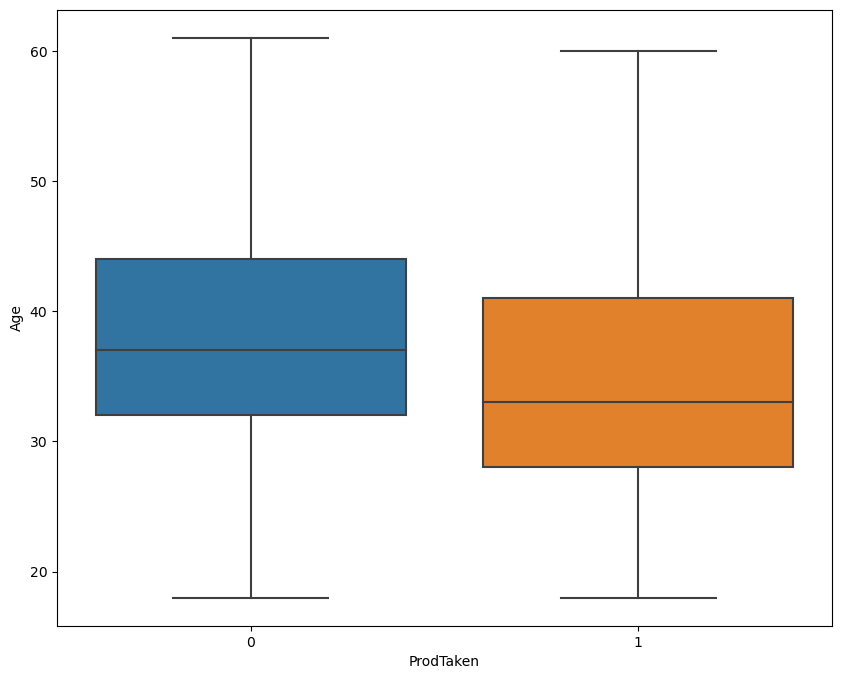

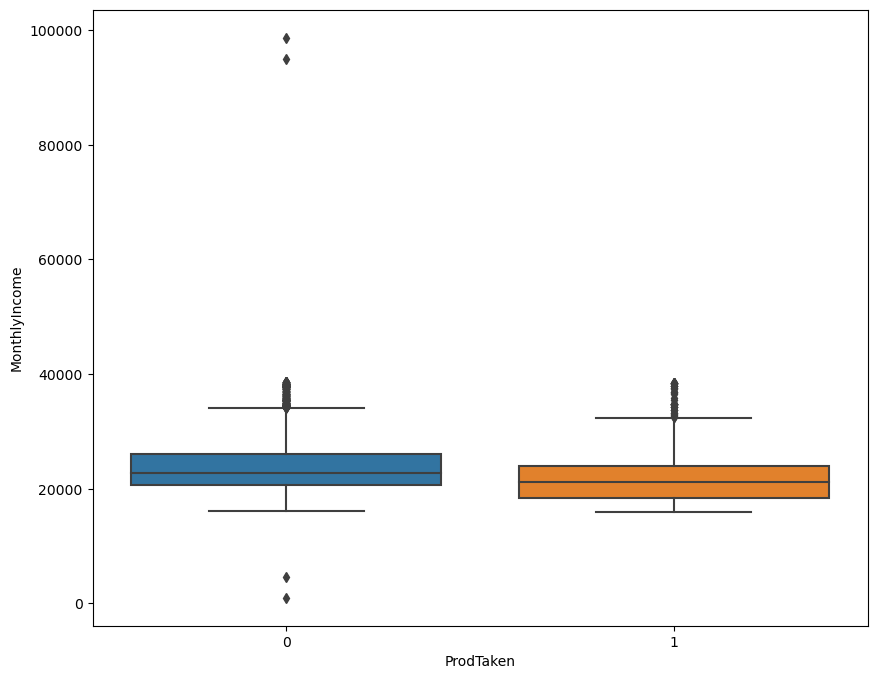

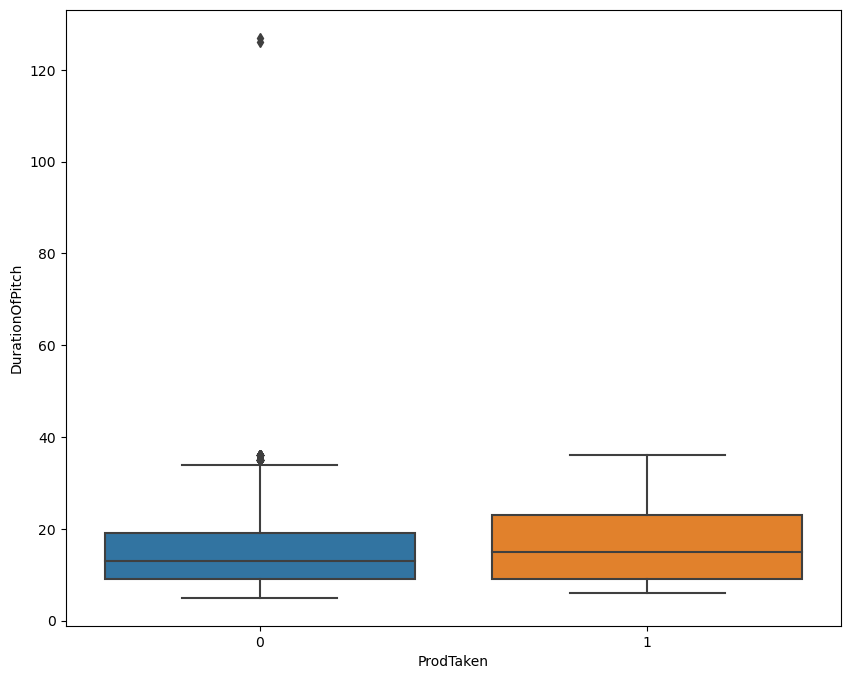

In [20]:
for i in numerical:
 plt.figure(figsize=(10,8))
 sns.boxplot(x=df['ProdTaken'],y=df[i],data=df)
 
 plt.show()

**Data Preprocessing**

In [21]:
df.head(1)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0


In [22]:
df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Now I fill up the null values.

In [23]:
df['TypeofContact'].mode()

0    Self Enquiry
dtype: object

In [24]:
#filling up the null values of TypeOfContact with the mode of the variable.
df['TypeofContact']=df['TypeofContact'].fillna('Self Enquiry')

In [25]:
#filling up the null values with the median after grouping it up with respect to the variables Gender and ProductPitched because these are the values which may influence NumberOfFollowUps
df['NumberOfFollowups']=df.groupby(['Gender','ProductPitched'])['NumberOfFollowups'].apply(lambda x:x.fillna(x.median()))

In [26]:
#filling up the null values with the median after grouping it up with respect to the variable Designation because these are the values which may influence PreferredPropertyStar
df['PreferredPropertyStar']=df.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

In [27]:
#filling up the null values with the median after grouping it up with respect to the variables ProductPitched and NumberOfFollowups because these are the values which may influence DurationOfPitch
df["DurationOfPitch"] = df.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(lambda x: x.fillna(x.median()))

In [28]:
df["NumberOfTrips"] = df.groupby(["MaritalStatus"])["NumberOfTrips"].apply(lambda x: x.fillna(x.median()))

In [29]:
#filling up the null values with 0 because may be there are no children visiting
df['NumberOfChildrenVisiting']=df['NumberOfChildrenVisiting'].fillna(0)

In [30]:
#filling up the null values with the median after grouping it up with respect to the variables Designation,Gender,MaritalStatus because these are the values which may influence Age
df["Age"] = df.groupby(["Designation", "Gender","MaritalStatus"])["Age"].apply(lambda x: x.fillna(x.median()))

In [31]:
#filling up the null values with the median after grouping it up with respect to the variables Occupation,Designation,Gender because these are the values which may influence MonthlyIncome
df["MonthlyIncome"]=df.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(lambda x: x.fillna(x.median()))

In [32]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [33]:
df.shape

(4888, 19)

Handling the outliers

In [34]:
df.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Divorced,2.0,0,2,1,2.0,VP,38677.0
4104,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Married,2.0,0,1,1,3.0,VP,38677.0
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,3.0,Married,3.0,0,4,1,1.0,VP,38651.0


In [35]:
df.sort_values(by=["MonthlyIncome"],ascending = False).tail(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
727,0,18.0,Company Invited,1,11.0,Salaried,Male,3,3.0,Basic,3.0,Single,2.0,0,2,1,1.0,Executive,16051.0
1983,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,3.0,Single,2.0,1,5,1,1.0,Executive,16009.0
513,1,20.0,Self Enquiry,1,16.0,Small Business,Male,2,3.0,Basic,3.0,Single,2.0,1,5,0,0.0,Executive,16009.0
2586,0,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0
142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0


In [36]:
df.drop(index=df[(df.MonthlyIncome>40000.0) | (df.MonthlyIncome<10000.0)].index,inplace=True)

In [37]:
df.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
4135,0,34.0,Self Enquiry,1,11.0,Small Business,Female,3,5.0,Basic,4.0,Married,8.0,0,4,0,2.0,Executive,21300.0


In [38]:
df.drop(index=df[df.NumberOfTrips>10].index,inplace=True)

In [39]:
df.sort_values(by=["DurationOfPitch"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0
1434,0,32.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0
4118,1,39.0,Self Enquiry,1,36.0,Small Business,Male,4,4.0,Deluxe,5.0,Married,2.0,1,3,1,3.0,Manager,25351.0
2868,0,58.0,Self Enquiry,3,36.0,Small Business,Male,3,5.0,Super Deluxe,3.0,Married,5.0,0,3,0,1.0,AVP,32796.0
3975,0,39.0,Company Invited,1,36.0,Salaried,Female,3,4.0,Deluxe,3.0,Single,3.0,0,3,1,1.0,Manager,21084.0


In [40]:
df.drop(index=df[df.DurationOfPitch>40].index,inplace=True)

In [41]:
df.shape

(4878, 19)

In [42]:
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

Based on the information provided, i assume that Customer interaction data will not be available for new and potiental customers so dropping columns related to customer interaction

In [43]:
X=df.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch'],axis=1)
Y=df['ProdTaken']
print(X.shape)
print(Y.shape)

(4878, 13)
(4878,)


In [44]:
columns_to_encode= []
for i in X.columns:
    if df[i].nunique() <20:
        columns_to_encode.append(i)
        
columns_to_encode

['TypeofContact',
 'CityTier',
 'Occupation',
 'Gender',
 'PreferredPropertyStar',
 'MaritalStatus',
 'NumberOfTrips',
 'Passport',
 'OwnCar',
 'Designation',
 'TotalVisiting']

In [45]:
df_encoded=pd.get_dummies(X,columns=columns_to_encode)
X=df_encoded
X

,Age,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,CityTier_1,CityTier_2,CityTier_3,Occupation_Free Lancer,Occupation_Large Business,Occupation_Salaried,...,Designation_Manager,Designation_Senior Manager,Designation_VP,TotalVisiting_1.0,TotalVisiting_2.0,TotalVisiting_3.0,TotalVisiting_4.0,TotalVisiting_5.0,TotalVisiting_6.0,TotalVisiting_7.0
0,41.0,20993.0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,49.0,20130.0,1,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,37.0,17090.0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,33.0,17909.0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,32.0,18468.0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,26576.0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4884,28.0,21212.0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4885,52.0,31820.0,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4886,19.0,20289.0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
df_encoded.shape


(4878, 44)

In [47]:
Y.value_counts()


0    3960
1     918
Name: ProdTaken, dtype: int64

Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [49]:
X_train.shape, X_test.shape

((3414, 44), (1464, 44))

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [51]:
X_train_std=pd.DataFrame(X_train_std)
X_train_std.columns=X.columns

X_test_std=pd.DataFrame(X_test_std)
X_test_std.columns=X.columns

# Model fitting

**Decision Tree**

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(class_weight={0:0.20, 1:0.80})
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

In [53]:
dtree_Y_train_pred=dtree.predict(X_train)
dtree_Y_test_pred=dtree.predict(X_test)

The accuracy score for the train data is: 1.0


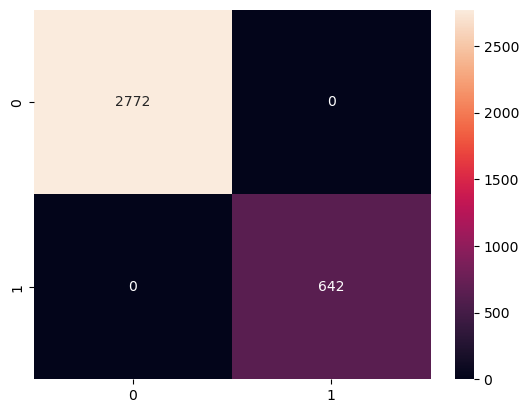

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

sns.heatmap(confusion_matrix(Y_train,dtree_Y_train_pred),annot=True,fmt='d')
print('The accuracy score for the train data is:',accuracy_score(Y_train,dtree_Y_train_pred))

The accuracy score for the test data is: 0.8565573770491803


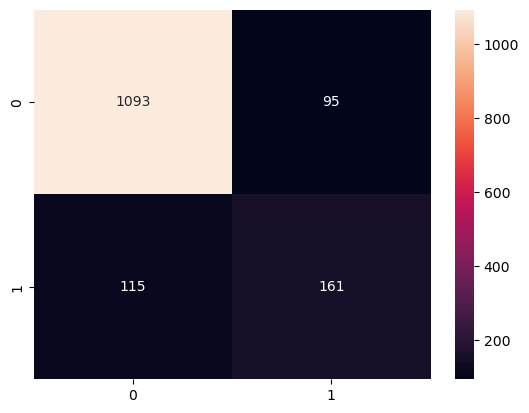

In [55]:
sns.heatmap(confusion_matrix(Y_test,dtree_Y_test_pred),annot=True,fmt='d')
print('The accuracy score for the test data is:',accuracy_score(Y_test,dtree_Y_test_pred))

**Logistic Regression**

In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(class_weight={0:0.20, 1:0.80})
lr.fit(X_train_std,Y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8})

In [57]:
lr_Y_train_pred=lr.predict(X_train_std)
lr_Y_test_pred=lr.predict(X_test_std)

The accuracy score for the train data is: 0.7480960749853545


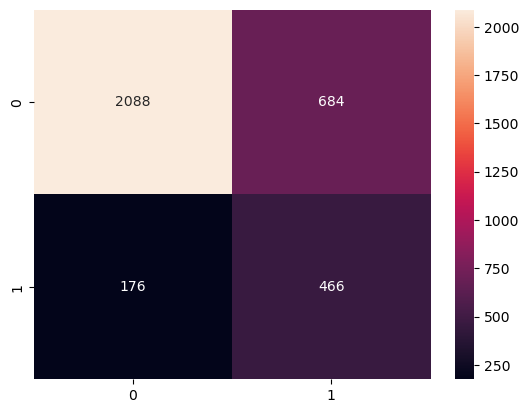

In [58]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

sns.heatmap(confusion_matrix(Y_train,lr_Y_train_pred),annot=True,fmt='d')
print('The accuracy score for the train data is:',accuracy_score(Y_train,lr_Y_train_pred))

In [59]:
print(classification_report(Y_train,lr_Y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2772
           1       0.41      0.73      0.52       642

    accuracy                           0.75      3414
   macro avg       0.66      0.74      0.67      3414
weighted avg       0.83      0.75      0.77      3414



The accuracy score for the test data is: 0.7431693989071039


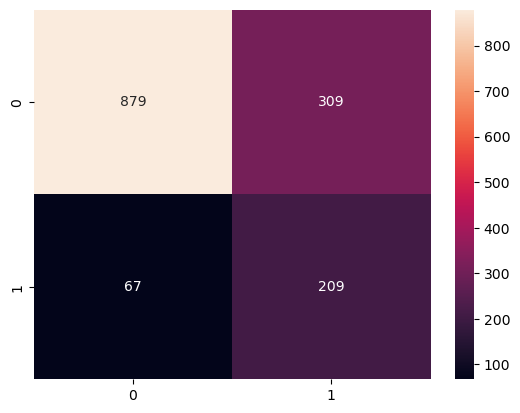

In [60]:
sns.heatmap(confusion_matrix(Y_test,lr_Y_test_pred),annot=True,fmt='d')
print('The accuracy score for the test data is:',accuracy_score(Y_test,lr_Y_test_pred))

In [61]:
print(classification_report(Y_test,lr_Y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1188
           1       0.40      0.76      0.53       276

    accuracy                           0.74      1464
   macro avg       0.67      0.75      0.68      1464
weighted avg       0.83      0.74      0.77      1464



Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

tuned_parameters=[{'max_depth':[10,50,100,200],'n_estimators':[50,100,200,500],'max_features':['sqrt','auto']}]
rf=RandomForestClassifier(class_weight={0:0.20, 1:0.80})
rf_clf=GridSearchCV(rf,tuned_parameters,cv=5)
rf_clf.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}),
             param_grid=[{'max_depth': [10, 50, 100, 200],
                          'max_features': ['sqrt', 'auto'],
                          'n_estimators': [50, 100, 200, 500]}])

In [63]:
rf_clf.best_params_


{'max_depth': 50, 'max_features': 'auto', 'n_estimators': 500}

In [64]:
rf=RandomForestClassifier(n_estimators=500,max_depth=15,max_features='sqrt',class_weight={0:0.20, 1:0.80})
rf.fit(X_train,Y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=15,
                       max_features='sqrt', n_estimators=500)

In [65]:
rf_pred_Y_train=rf.predict(X_train)


The accuracy score for train data is: 0.9988283538371412


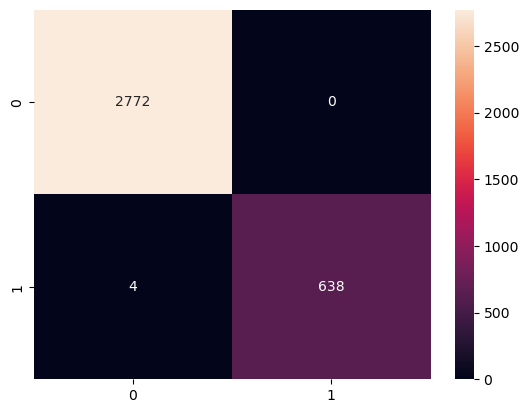

In [66]:
sns.heatmap(confusion_matrix(Y_train,rf_pred_Y_train),annot=True,fmt='d')
print('The accuracy score for train data is:',accuracy_score(Y_train,rf_pred_Y_train))

In [67]:
print(classification_report(Y_train,rf_pred_Y_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2772
           1       1.00      0.99      1.00       642

    accuracy                           1.00      3414
   macro avg       1.00      1.00      1.00      3414
weighted avg       1.00      1.00      1.00      3414



In [68]:
rf_pred_Y_test=rf.predict(X_test)

The accuracy score for test data is: 0.8859289617486339


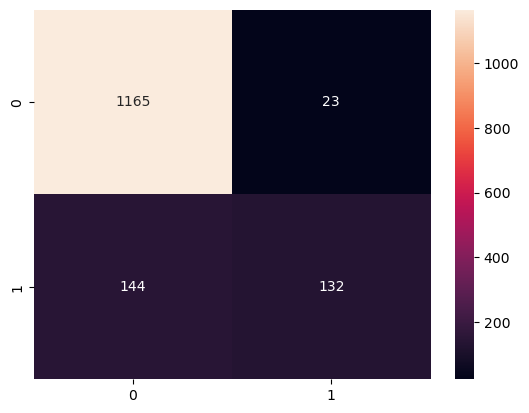

In [69]:
sns.heatmap(confusion_matrix(Y_test,rf_pred_Y_test),annot=True,fmt='d')
print('The accuracy score for test data is:',accuracy_score(Y_test,rf_pred_Y_test))

In [70]:
print(classification_report(Y_test,rf_pred_Y_test))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1188
           1       0.85      0.48      0.61       276

    accuracy                           0.89      1464
   macro avg       0.87      0.73      0.77      1464
weighted avg       0.88      0.89      0.87      1464



<AxesSubplot:xlabel='Importance', ylabel='Features'>

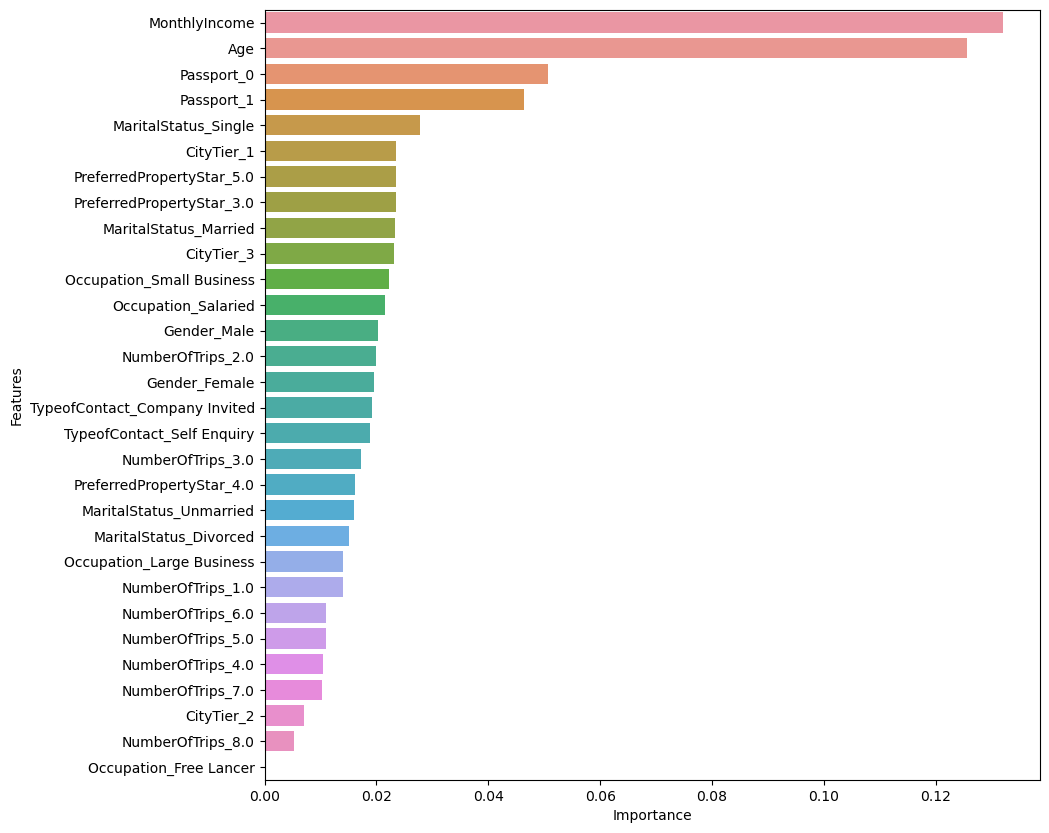

In [71]:
feature_rank=pd.DataFrame({'Features':X_train.columns,'Importance':rf.feature_importances_})[:30]
feature_rank=feature_rank.sort_values('Importance',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y='Features',x='Importance',data=feature_rank)

SVM

In [72]:
from sklearn.svm import SVC

In [73]:
svm=SVC(class_weight={0:0.20, 1:0.80})

parameter_tuning=[{'C':[1,10,100],'kernel':['linear']},
                 {'C':[1,10,100],'gamma':[0.001,0.0001],'kernel':['rbf']}]

svm_clf=GridSearchCV(svm,parameter_tuning,scoring='roc_auc',cv=5)
svm_clf.fit(X_train_std,Y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight={0: 0.2, 1: 0.8}),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='roc_auc')

In [74]:
svm=SVC(**svm_clf.best_params_,class_weight={0:0.20, 1:0.80})
svm.fit(X_train_std,Y_train)

SVC(C=100, class_weight={0: 0.2, 1: 0.8}, gamma=0.001)

In [75]:
svm_Y_train_pred=svm.predict(X_train_std)
svm_Y_test_pred=svm.predict(X_test_std)

The accuracy score for the train data : 0.8016988869361453


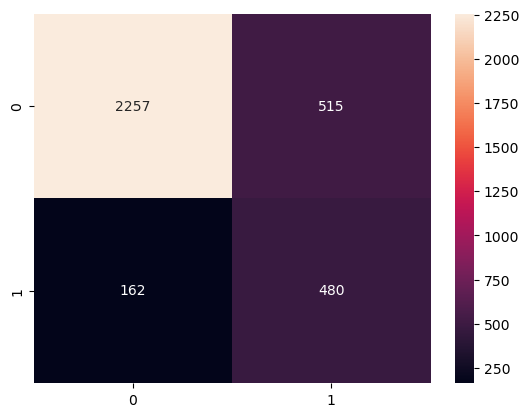

In [76]:
sns.heatmap(confusion_matrix(Y_train,svm_Y_train_pred),annot=True,fmt='d')
print('The accuracy score for the train data :',accuracy_score(Y_train,svm_Y_train_pred))

In [77]:
print(classification_report(Y_train,svm_Y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      2772
           1       0.48      0.75      0.59       642

    accuracy                           0.80      3414
   macro avg       0.71      0.78      0.73      3414
weighted avg       0.85      0.80      0.82      3414



The accuracy score for the test data : 0.7759562841530054


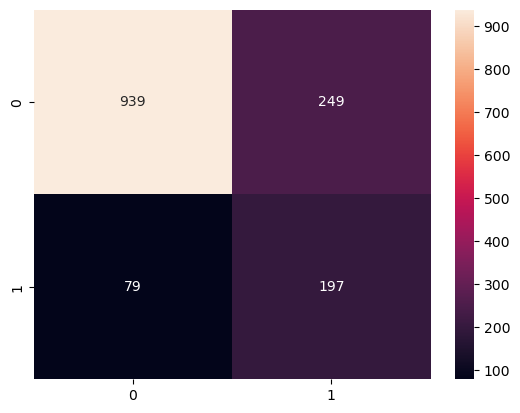

In [78]:
sns.heatmap(confusion_matrix(Y_test,svm_Y_test_pred),annot=True,fmt='d')
print('The accuracy score for the test data :',accuracy_score(Y_test,svm_Y_test_pred))

In [79]:
print(classification_report(Y_test,svm_Y_test_pred))


              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1188
           1       0.44      0.71      0.55       276

    accuracy                           0.78      1464
   macro avg       0.68      0.75      0.70      1464
weighted avg       0.83      0.78      0.79      1464



XGBoost

In [80]:
!pip install xgboost

from xgboost import XGBClassifier

xgb=XGBClassifier(class_weight={0:0.20, 1:0.80})
xgb.fit(X_train,Y_train)

[10:01:32] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight={0: 0.2, 1: 0.8}, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, ...)

<AxesSubplot:xlabel='Importance', ylabel='Features'>

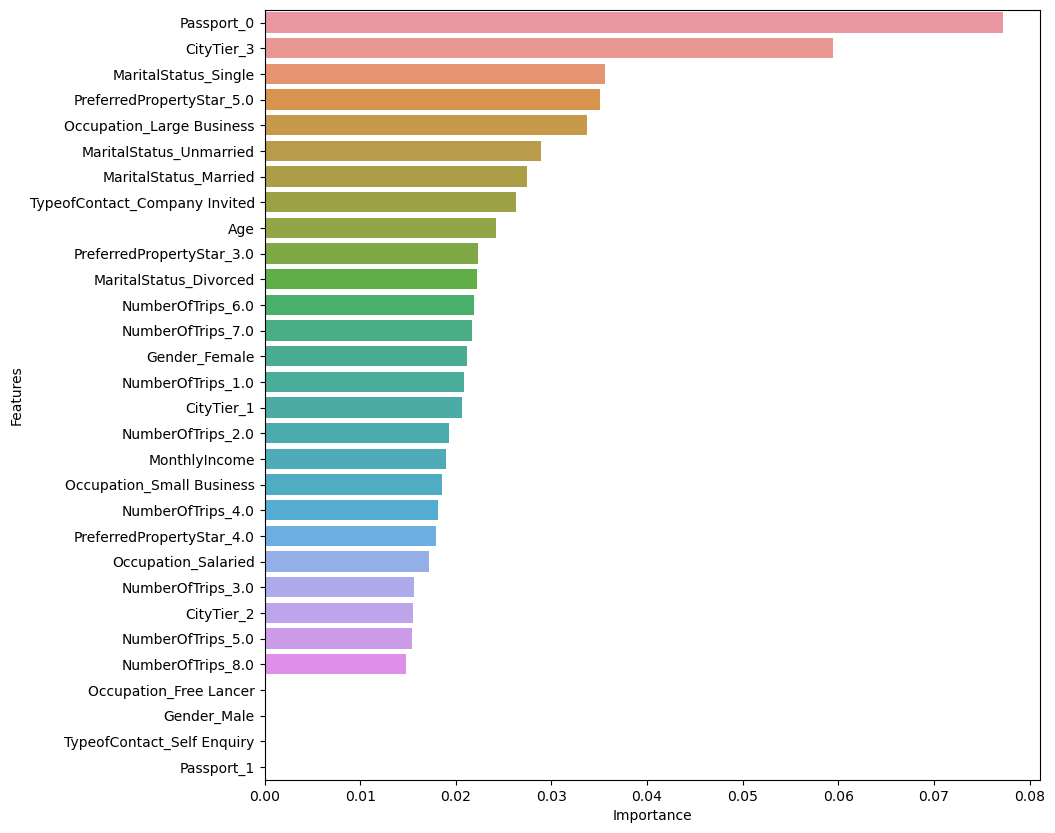

In [81]:
feature_imp=pd.DataFrame({'Features':X_train.columns,'Importance':xgb.feature_importances_})[:30]
feature_imp=feature_imp.sort_values('Importance',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y='Features',x='Importance',data=feature_imp)

In [82]:
xgb_Y_train_pred=xgb.predict(X_train)
xgb_Y_test_pred=xgb.predict(X_test)

The accuracy score for train data is: 0.9926772114821324


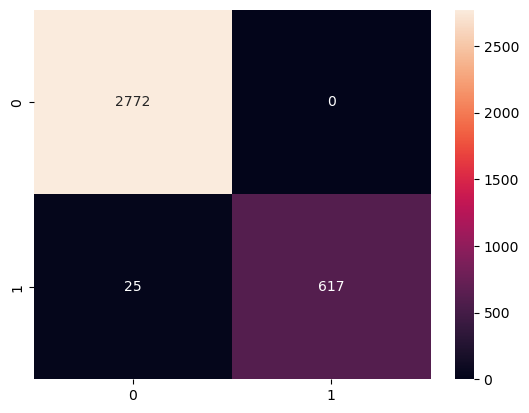

In [83]:
sns.heatmap(confusion_matrix(Y_train,xgb_Y_train_pred),annot=True,fmt='d')
print('The accuracy score for train data is:',accuracy_score(Y_train,xgb_Y_train_pred))

In [84]:
print(classification_report(Y_train,xgb_Y_train_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2772
           1       1.00      0.96      0.98       642

    accuracy                           0.99      3414
   macro avg       1.00      0.98      0.99      3414
weighted avg       0.99      0.99      0.99      3414



The accuracy score for test data is: 0.8852459016393442


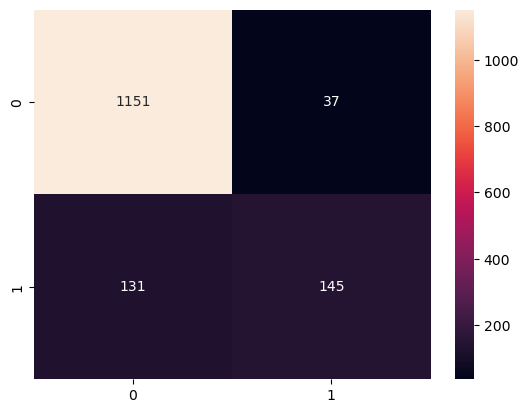

In [85]:
sns.heatmap(confusion_matrix(Y_test,xgb_Y_test_pred),annot=True,fmt='d')
print('The accuracy score for test data is:',accuracy_score(Y_test,xgb_Y_test_pred))

In [86]:
print(classification_report(Y_test,xgb_Y_test_pred))


              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1188
           1       0.80      0.53      0.63       276

    accuracy                           0.89      1464
   macro avg       0.85      0.75      0.78      1464
weighted avg       0.88      0.89      0.88      1464



ANN

In [87]:
!pip install tensorflow 

import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.82.0 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.


In [88]:
ann_model= tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=500,activation='relu',input_shape= (44,)))
ann_model.add(tf.keras.layers.Dense(units=500,activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [89]:
ann_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               22500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 273,501
Trainable params: 273,501
Non-trainable params: 0
_________________________________________________________________


In [90]:
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')


In [91]:
epochs=ann_model.fit(X_train,Y_train,epochs=100,batch_size=25)

Epoch 1/100
137/137 [==============================] - 1s 4ms/step - loss: 208.0718 - accuracy: 0.6948
Epoch 2/100
137/137 [==============================] - 1s 4ms/step - loss: 76.3288 - accuracy: 0.7068
Epoch 3/100
137/137 [==============================] - 1s 4ms/step - loss: 63.1826 - accuracy: 0.7068
Epoch 4/100
137/137 [==============================] - 1s 4ms/step - loss: 50.1568 - accuracy: 0.6974
Epoch 5/100
137/137 [==============================] - 1s 4ms/step - loss: 22.6979 - accuracy: 0.7024
Epoch 6/100
137/137 [==============================] - 1s 4ms/step - loss: 24.9938 - accuracy: 0.7001
Epoch 7/100
137/137 [==============================] - 1s 4ms/step - loss: 24.2524 - accuracy: 0.6930
Epoch 8/100
137/137 [==============================] - 1s 4ms/step - loss: 21.9261 - accuracy: 0.6948
Epoch 9/100
137/137 [==============================] - 1s 4ms/step - loss: 16.4840 - accuracy: 0.6965
Epoch 10/100
137/137 [==============================] - 1s 4ms/step - loss: 10.81

In [92]:
Y_pred=ann_model.predict(X_test)
Y_pred = (Y_pred>0.5)

46/46 [==============================] - 0s 2ms/step


Accuracy 81.14754098360656 %


<AxesSubplot:>

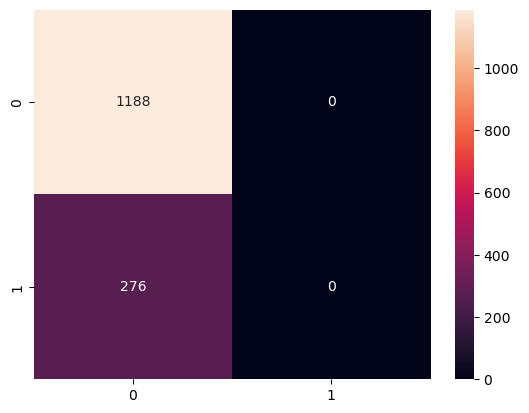

In [93]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm = confusion_matrix(Y_test,Y_pred)
print('Accuracy {} %'.format(100* accuracy_score(Y_pred,Y_test)))

sns.heatmap(cm,annot=True, fmt='d')

The best model gives 63% accuracy on the test data.